In [1]:
import pandas as pd

In [ ]:
# @title install pandas-profiling
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [3]:
import pandas_profiling

<ipython-input-3-6a00893fb3e1>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [4]:
data=pd.read_csv('/content/drive/MyDrive/Westminster/MSCProject/data/Loan_default.csv')

In [5]:
data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0.0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0.0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1.0
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0.0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0.0


In [6]:
data.profile_report()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# @title Install Seaborn
!pip install seaborn

<Axes: xlabel='Default', ylabel='count'>

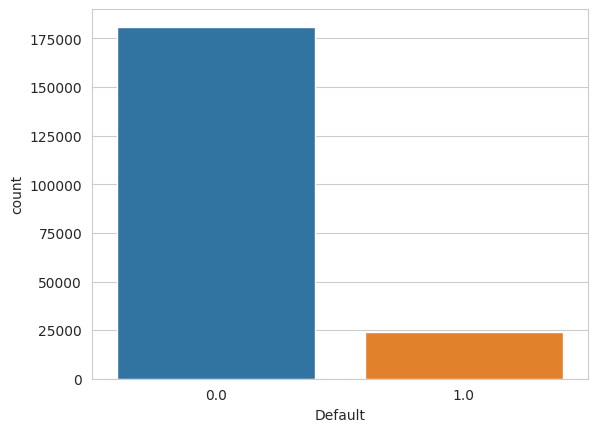

In [8]:
import seaborn as sns
sns.set_style("whitegrid")
sns.countplot(x = 'Default', data = data)

In [14]:
df = data.drop(['Education','LoanID', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner'], axis=1)



comat = df.corr()

In [15]:
comat['Default']

Age              -0.169644
Income           -0.099584
LoanAmount        0.086475
CreditScore      -0.033948
MonthsEmployed   -0.098329
NumCreditLines    0.027597
InterestRate      0.129872
LoanTerm          0.002110
DTIRatio          0.019589
Default           1.000000
Name: Default, dtype: float64

<Axes: >

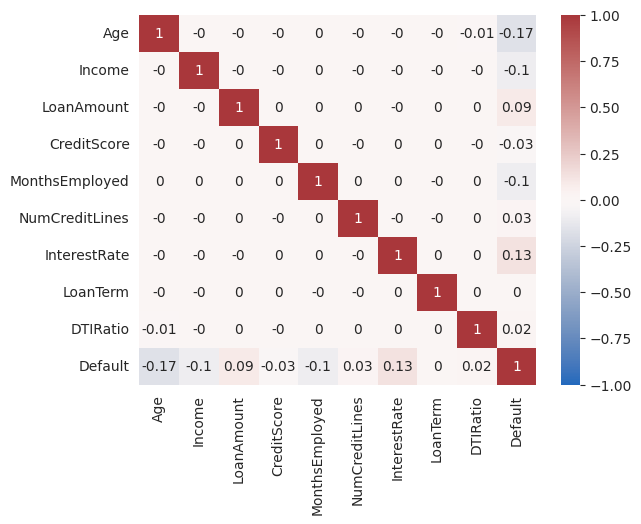

In [17]:
import matplotlib.pyplot as plt
sns.heatmap(df.corr().round(2), annot=True, vmin=-1, vmax=1, center=0, cmap='vlag')

In [18]:
# @title Extract numberic columns
numeric_cols = []
for col in data.columns:
    if data[col].dtype in ['int64', 'float64']:  # Or other numeric types
        numeric_cols.append(col)
print(numeric_cols)

['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Default']


<Axes: >

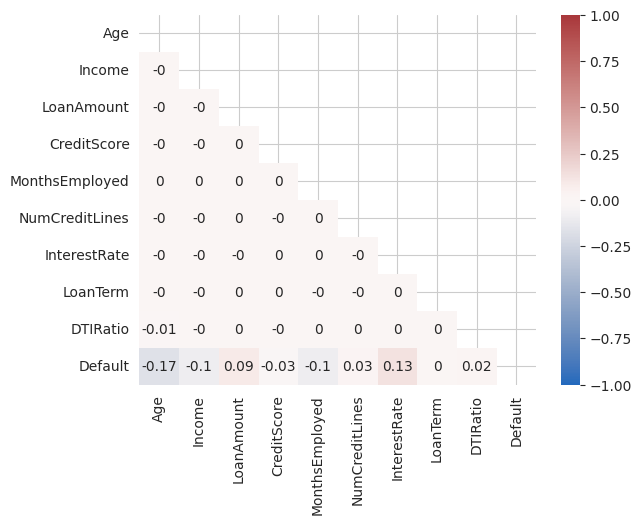

In [19]:
import numpy as np
df = data[numeric_cols].corr().round(2)
mask = np.triu(np.ones_like(df, dtype=bool))
sns.heatmap(df, annot=True, vmin=-1, vmax=1, center=0, cmap='vlag', mask=mask)